<a href="https://colab.research.google.com/github/MRazin172/CV_Lab6/blob/main/2348534_CV_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
image = cv2.imread('/content/download (10).jpeg', 0)


#BUILT IN

In [14]:
median_filtered = cv2.medianBlur(image, 5)


max_filtered = cv2.dilate(image, np.ones((5, 5), np.uint8))


min_filtered = cv2.erode(image, np.ones((5, 5), np.uint8))


mid_point_filtered = (max_filtered + min_filtered) / 2


alpha_trimmed_filtered = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

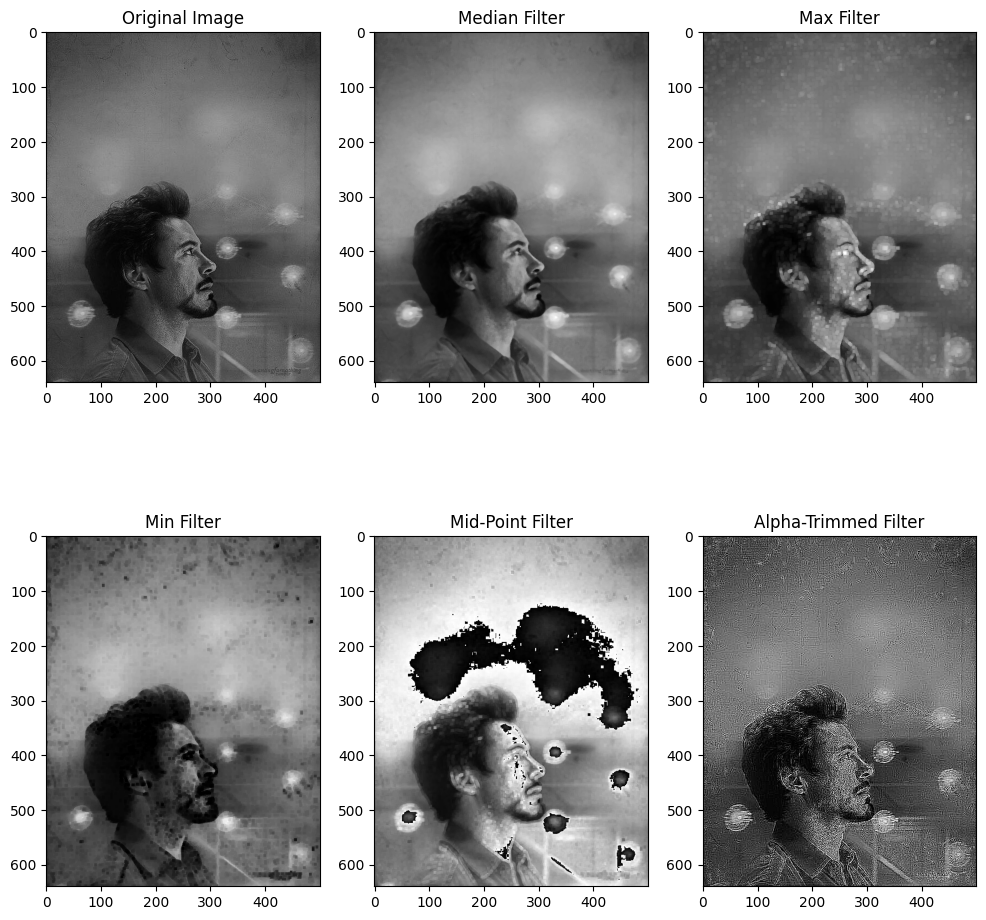

In [15]:
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filter')
plt.subplot(233), plt.imshow(max_filtered, cmap='gray'), plt.title('Max Filter')
plt.subplot(234), plt.imshow(min_filtered, cmap='gray'), plt.title('Min Filter')
plt.subplot(235), plt.imshow(mid_point_filtered, cmap='gray'), plt.title('Mid-Point Filter')
plt.subplot(236), plt.imshow(alpha_trimmed_filtered, cmap='gray'), plt.title('Alpha-Trimmed Filter')

plt.show()


1. **Median Filter**:
   - In a median filter, we replace each pixel's value with the median value of the surrounding pixels in a defined neighborhood.
   - Imagine you have a grid of pixels representing an image. For each pixel, you look at the surrounding pixels within a defined area (often a square or rectangle). Then, you sort the values of all these pixels and choose the middle value (the median) as the new value for the current pixel.
   - This filter is effective in removing salt-and-pepper noise, where isolated bright or dark pixels appear randomly in the image.

2. **Max Filter**:
   - In a max filter, we replace each pixel's value with the maximum value of the surrounding pixels in a defined neighborhood.
   - Similar to the median filter, you look at the surrounding pixels within a defined area. Instead of taking the median value, you simply choose the maximum value among them as the new value for the current pixel.
   - This filter is useful for highlighting bright features and edges in an image.

3. **Min Filter**:
   - In a min filter, we replace each pixel's value with the minimum value of the surrounding pixels in a defined neighborhood.
   - Again, similar to the median and max filters, you look at the surrounding pixels within a defined area. This time, you choose the minimum value among them as the new value for the current pixel.
   - This filter is effective in highlighting dark features and edges in an image.

4. **Mid-Point Filter**:
   - In a mid-point filter, we replace each pixel's value with the average of the maximum and minimum values of the surrounding pixels in a defined neighborhood.
   - This filter combines the effects of the max and min filters. Instead of directly choosing the maximum or minimum value, you calculate the average (mid-point) of these extreme values and assign it to the current pixel.
   - It can reduce the effects of extreme brightness or darkness in an image while preserving some details.

5. **Alpha-Trimmed Filter**:
   - In an alpha-trimmed filter, we replace each pixel's value with the average of the pixel values after removing a certain percentage of extreme values from the surrounding pixels in a defined neighborhood.
   - You sort the values of all the surrounding pixels within a defined area and discard a certain percentage of extreme values from both ends. Then, you calculate the average of the remaining values and assign it to the current pixel.
   - This filter can reduce the impact of outliers or extreme noise in an image while maintaining some level of detail.

#USER-DEFINED

In [16]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt


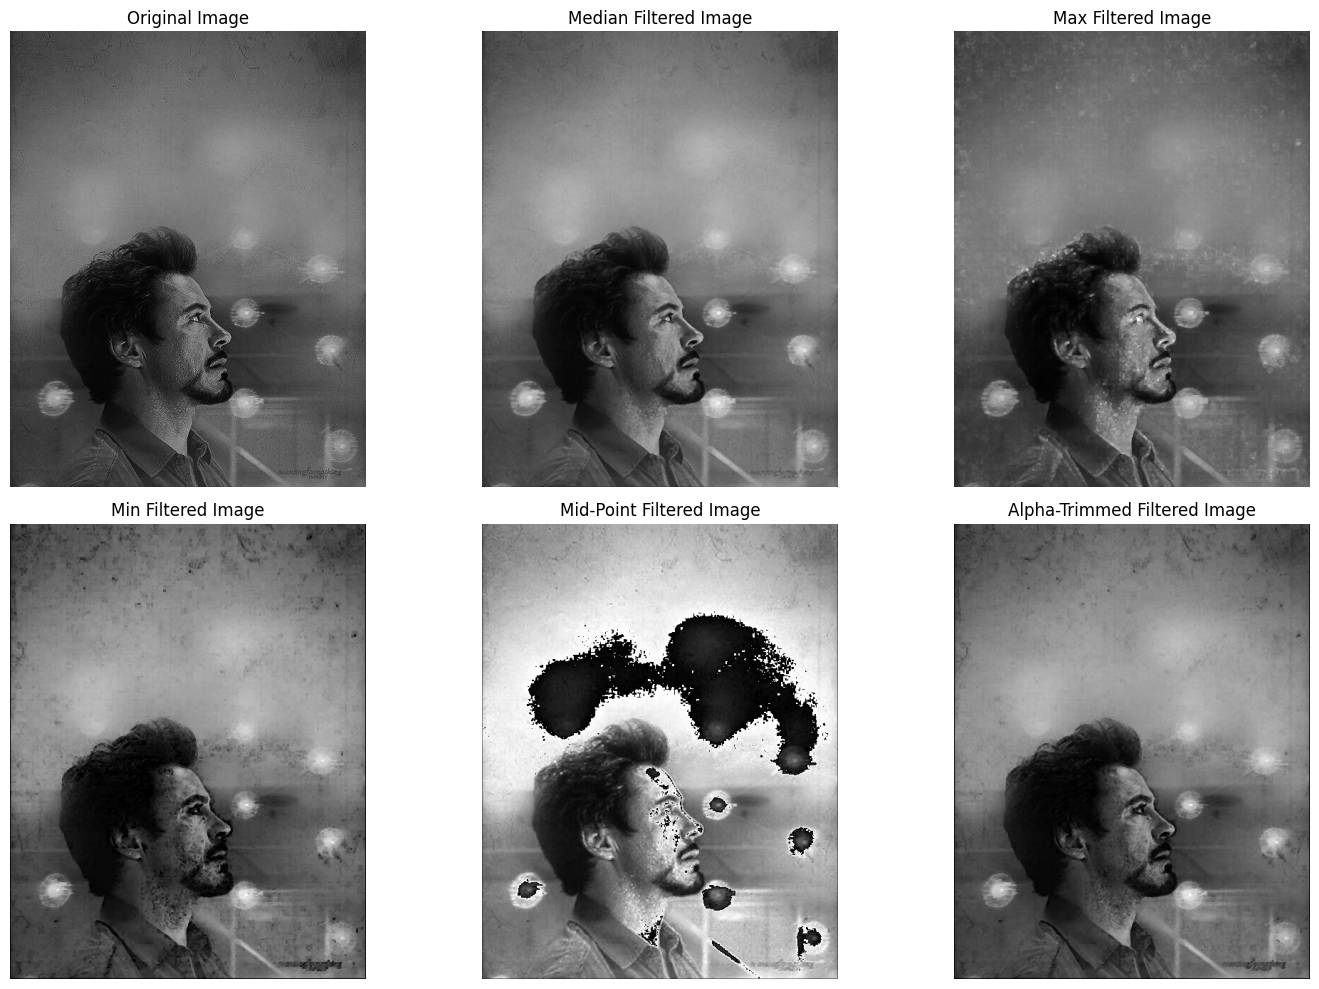

In [17]:

def median_filter(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])
    return filtered_image.astype(np.uint8)

def max_filter(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.max(padded_image[i:i+kernel_size, j:j+kernel_size])
    return filtered_image.astype(np.uint8)

def min_filter(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.min(padded_image[i:i+kernel_size, j:j+kernel_size])
    return filtered_image.astype(np.uint8)

def mid_point_filter(image, kernel_size):
    max_filtered_image = max_filter(image, kernel_size)
    min_filtered_image = min_filter(image, kernel_size)
    mid_point_filtered_image = (max_filtered_image + min_filtered_image) / 2
    return mid_point_filtered_image.astype(np.uint8)

def alpha_trimmed_filter(image, kernel_size, alpha):
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sorted_pixels = np.sort(padded_image[i:i+kernel_size, j:j+kernel_size].flatten())
            trimmed_pixels = sorted_pixels[int(alpha * kernel_size * kernel_size / 2) : int((1 - alpha) * kernel_size * kernel_size / 2)]
            filtered_image[i, j] = np.mean(trimmed_pixels)
    return filtered_image.astype(np.uint8)

image = cv2.imread('/content/download (10).jpeg', cv2.IMREAD_GRAYSCALE)
median_filtered_image = median_filter(image, 3)
max_filtered_image = max_filter(image, 3)
min_filtered_image = min_filter(image, 3)
mid_point_filtered_image = mid_point_filter(image, 3)
alpha_trimmed_filtered_image = alpha_trimmed_filter(image, 3, alpha=0.2)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(median_filtered_image, cmap='gray')
axs[0, 1].set_title('Median Filtered Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(max_filtered_image, cmap='gray')
axs[0, 2].set_title('Max Filtered Image')
axs[0, 2].axis('off')

axs[1, 0].imshow(min_filtered_image, cmap='gray')
axs[1, 0].set_title('Min Filtered Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(mid_point_filtered_image, cmap='gray')
axs[1, 1].set_title('Mid-Point Filtered Image')
axs[1, 1].axis('off')

axs[1, 2].imshow(alpha_trimmed_filtered_image, cmap='gray')
axs[1, 2].set_title('Alpha-Trimmed Filtered Image')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
